In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas
import sklearn, sklearn.pipeline, sklearn.preprocessing, sklearn.svm

In [3]:
fuelings = pandas.read_csv('864970_fuelings.csv', sep=';')

for col in ('Km-Stand', 'Teil-Km', 'Spritmenge', 'Kosten', 'Verbrauch'):
    fuelings[col] = pandas.to_numeric(fuelings[col].str.replace(',', '.'))
fuelings['Datum'] = pandas.to_datetime(fuelings['Datum'], format='%d.%m.%Y')

print(f'Tankkosten gesamt:   {fuelings["Kosten"].sum():7.2f} EUR')
print(f'Tankkosten / 100 KM: {100 * fuelings["Kosten"].sum() / fuelings["Km-Stand"].max():7.2f} EUR')

Tankkosten gesamt:   2277.04 EUR
Tankkosten / 100 KM:    5.51 EUR


In [4]:
def create_timeseries_density_function(df, datetime_key, value_key, std, period='1D'):
    ts = pandas.Series(df[value_key].values, index=pandas.DatetimeIndex(df[datetime_key].values))
    ts = ts.resample(period).sum()
    return ts.rolling(window=10 * std, win_type='gaussian', center=True, min_periods=0).sum(std=std)

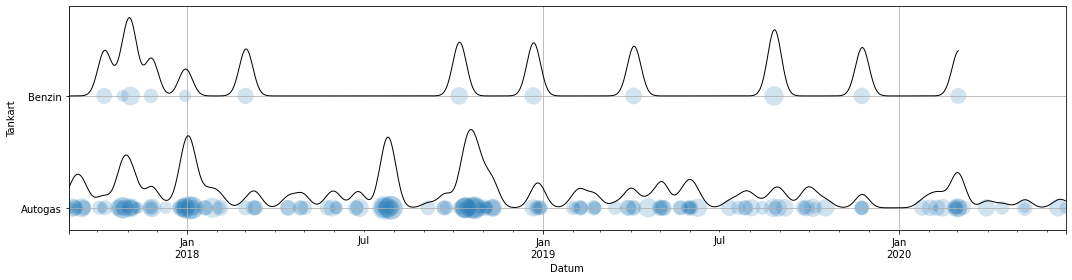

In [5]:
ax = None
for fueltype in (1, 2):
    ts = create_timeseries_density_function(fuelings[fuelings['Tankart'] == fueltype], 'Datum', 'Kosten', 7)
    ax = (fueltype + 0.7 * ts / ts.max()).plot(ax=ax, figsize=(15,4), style=['k-'], lw=1)
fuelings.plot.scatter('Datum', 'Tankart', fuelings['Kosten'] * 20, alpha=0.2, lw=0, ax=ax)
yticks([1, 2], ['Autogas', 'Benzin'])
ylim(0.8, 2.8)
grid()
tight_layout()

In [6]:
others = pandas.read_csv('864970_costs.csv', sep=';')

for col in ('Km-Stand', 'Gesamtkosten'):
    others[col] = pandas.to_numeric(others[col].str.replace(',', '.'))
others['Datum'] = pandas.to_datetime(others['Datum'], format='%d.%m.%Y')

others

,Datum,Km-Stand,Kostenart,Gesamtkosten,Währung,Bemerkung
0,2020-06-25,41500.0,Wartung,412.05,EUR,Wartung + TÜV (HU + AU)
1,2020-04-16,40529.0,Wagenpflege,7.95,EUR,Wäsche
2,2020-04-16,40520.0,Reifenwechsel,20.00,EUR,Wechsel auf Sommerreifen
3,2019-11-22,36922.0,Reifenwechsel,20.00,EUR,Wechsel auf Winterreifen
4,2019-10-01,0.0,Parkgebühr,23.00,EUR,NaN
5,2019-09-27,0.0,Bußgeld,188.50,EUR,NaN
6,2019-09-02,0.0,Parkgebühr,36.00,EUR,NaN
7,2019-09-01,0.0,Versicherung,666.00,EUR,NaN
8,2019-09-01,0.0,Parkgebühr,23.00,EUR,NaN
9,2019-08-01,0.0,Parkgebühr,23.00,EUR,NaN


In [7]:
other_costs_by_type = others.groupby('Kostenart')['Gesamtkosten'].sum()
other_costs_by_type

Kostenart
Bußgeld            284.50
Kaufpreis        11940.00
Parkgebühr         634.00
Reifenwechsel      360.00
Tuning             342.00
Versicherung      2026.80
Wagenpflege        215.90
Wartung           1040.57
Zubehör             16.05
Name: Gesamtkosten, dtype: float64

In [8]:
other_costs_sum = other_costs_by_type.sum() - other_costs_by_type["Kaufpreis"]
limit_dates     = (others['Datum'].min(), others['Datum'].max())
months_in_use   = (limit_dates[1].year - limit_dates[0].year) * 12 + (limit_dates[1].month - limit_dates[0].month)

print(f'Summe laufender Kosten: {other_costs_sum:7.2f} EUR')
print(f'{months_in_use} Monate in Gebrauch ({months_in_use / 12:3.1f} Jahre)')
print()
print(f'Durchschnittliche Kosten / Monat: {     other_costs_sum / months_in_use:7.2f} EUR')
print(f'Durchschnittliche Kosten / Jahr:  {12 * other_costs_sum / months_in_use:7.2f} EUR')

Summe laufender Kosten: 4919.82 EUR
34 Monate in Gebrauch (2.8 Jahre)

Durchschnittliche Kosten / Monat:  144.70 EUR
Durchschnittliche Kosten / Jahr:  1736.41 EUR


In [9]:
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']
colorpalette = {}
for key in other_costs_by_type.keys():
    if key == 'Kaufpreis': continue
    color = COLORS[len(colorpalette) % len(COLORS)]
    colorpalette[key] = color

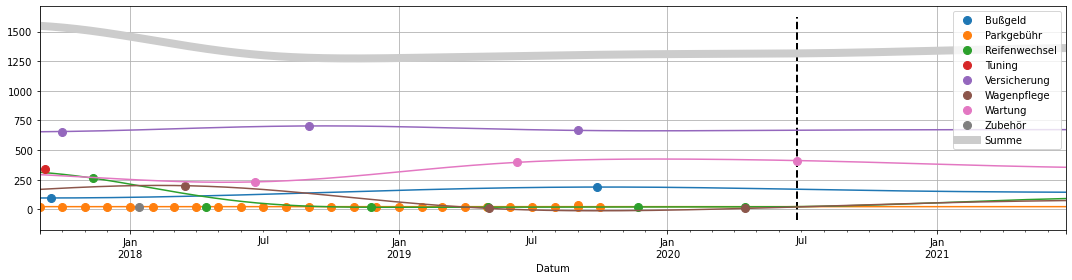

In [10]:
def datetime_to_timestamp(array):
    return array.astype(np.int64) // (10 ** 9)

def learn_model(df, datetime_key, value_key, *args, **kwargs):
    X = datetime_to_timestamp(df[datetime_key].values)[:, None]
    y = df[value_key].values
    model = sklearn.pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(), sklearn.svm.SVR(*args, **kwargs))
    model.fit(X, y)
    return model

def compute_model_function(df, datetimes, *model_args, **model_kwargs):
    model = learn_model(df, *model_args, **model_kwargs)
    X = datetime_to_timestamp(datetime_series.values)[:, None]
    y = model.predict(X)
    return y

datetime_series = pandas.date_range(others['Datum'].min(), others['Datum'].max() + datetime.timedelta(days=365), freq='1D')

ax = None
model_functions = {}
for key in other_costs_by_type.keys():
    if key == 'Kaufpreis': continue
    rows_df = others[others['Kostenart'] == key]
    if len(rows_df) >= 2:
        y = compute_model_function(rows_df, datetime_series, 'Datum', 'Gesamtkosten', gamma=1, C=500)
        model_functions[key] = y
        df = pandas.Series(y, index=datetime_series)
        ax = df.plot(figsize=(15,4), c=colorpalette[key], label='_nolegend_', ax=ax)
    ax = rows_df.plot('Datum', 'Gesamtkosten', style=['o'], ms=8, c=colorpalette[key], figsize=(15,4), label=key, ax=ax)
grid()
df_sum = pandas.Series(np.sum(list(model_functions.values()), axis=0), index=datetime_series)
df_sum.plot(style=['0.8'], lw=8, label='Summe')
vlines([others['Datum'].max()], *ylim(), ls='--', lw=2)
grid()
legend()
tight_layout()